In [1]:
import pandas as pd

In [10]:
df = pd.read_csv("melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [11]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Backup df ke df_copy. In case ada bad things happen to df, bisa restore dari df_copy

In [12]:
df_copy = df.copy()

Pilih kolom yang akan digunakan ke df

In [14]:
df = df_copy[['Rooms','Bathroom', 'Car', 'Landsize', 'BuildingArea','Price']].copy()

Exploratory Data Analysis untuk Feature Engineering

In [15]:
df.describe()

,Rooms,Bathroom,Car,Landsize,BuildingArea,Price
count,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,1.358000e+04
mean,2.937997,1.534242,1.610075,558.416127,151.967650,1.075684e+06
std,0.955748,0.691712,0.962634,3990.669241,541.014538,6.393107e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,8.500000e+04
25%,2.000000,1.000000,1.000000,177.000000,93.000000,6.500000e+05
50%,3.000000,1.000000,2.000000,440.000000,126.000000,9.030000e+05
75%,3.000000,2.000000,2.000000,651.000000,174.000000,1.330000e+06
max,10.000000,8.000000,10.000000,433014.000000,44515.000000,9.000000e+06


Kita coba lihat korelasi antar kolomnya

In [16]:
df.corr()

,Rooms,Bathroom,Car,Landsize,BuildingArea,Price
Rooms,1.000000,0.592934,0.408483,0.025678,0.124127,0.496634
Bathroom,0.592934,1.000000,0.322246,0.037130,0.111933,0.467038
Car,0.408483,0.322246,1.000000,0.026770,0.096101,0.238979
Landsize,0.025678,0.037130,0.026770,1.000000,0.500485,0.037507
BuildingArea,0.124127,0.111933,0.096101,0.500485,1.000000,0.090981
Price,0.496634,0.467038,0.238979,0.037507,0.090981,1.000000


Ternyata banyak data kosong, maka kita lakukan data cleansing

In [17]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,Rooms,Bathroom,Car,Landsize,BuildingArea,Price
0,2,1.0,0.0,156.0,79.0,1035000.0
1,3,2.0,0.0,134.0,150.0,1465000.0
2,4,1.0,2.0,120.0,142.0,1600000.0
3,3,2.0,0.0,245.0,210.0,1876000.0
4,2,1.0,2.0,256.0,107.0,1636000.0


Cek data hasil cleansing, berapa count datanya, dan nilai2 lainnya

In [18]:
df.describe()

,Rooms,Bathroom,Car,Landsize,BuildingArea,Price
count,7101.000000,7101.000000,7101.000000,7101.000000,7101.000000,7.101000e+03
mean,2.979299,1.601183,1.611182,490.253063,152.128903,1.078628e+06
std,0.971709,0.720969,0.945223,1038.236305,542.109910,6.749127e+05
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.310000e+05
25%,2.000000,1.000000,1.000000,165.000000,93.000000,6.300000e+05
50%,3.000000,1.000000,2.000000,401.000000,126.000000,8.905000e+05
75%,4.000000,2.000000,2.000000,640.000000,174.000000,1.330000e+06
max,8.000000,8.000000,10.000000,44500.000000,44515.000000,9.000000e+06


Cek correlation setelah cleansing

In [19]:
df.corr()

,Rooms,Bathroom,Car,Landsize,BuildingArea,Price
Rooms,1.000000,0.609637,0.422289,0.100213,0.124066,0.515044
Bathroom,0.609637,1.000000,0.332101,0.082388,0.111862,0.490007
Car,0.422289,0.332101,1.000000,0.120101,0.096101,0.251057
Landsize,0.100213,0.082388,0.120101,1.000000,0.503151,0.067929
BuildingArea,0.124066,0.111862,0.096101,0.503151,1.000000,0.091182
Price,0.515044,0.490007,0.251057,0.067929,0.091182,1.000000


Visualisasi data secara exploratif

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

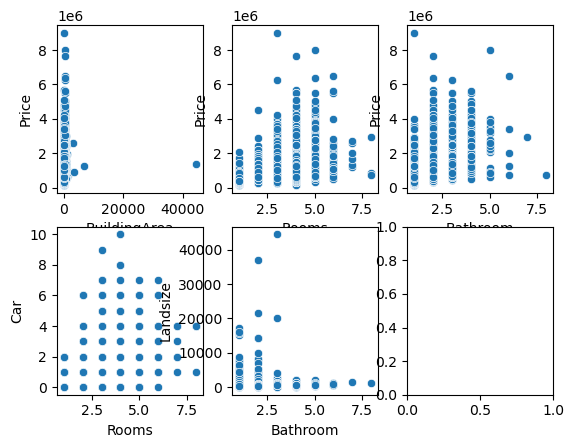

In [21]:
fig, axes = plt.subplots(ncols=3,nrows=2)

sns.scatterplot(
    data = df,
    x = "BuildingArea",
    y = "Price",
    ax=axes[0][0]
)
sns.scatterplot(
    data = df,
    x = "Rooms",
    y = "Price",
    ax=axes[0][1]
)
sns.scatterplot(
    data = df,
    x = "Bathroom",
    y = "Price",
    ax=axes[0][2]
)
sns.scatterplot(
    data = df,
    x = "Rooms",
    y = "Car",
    ax=axes[1][0]
)
sns.scatterplot(
    data = df,
    x = "Bathroom",
    y = "Landsize",
    ax=axes[1][1]
)
plt.show()

Filtering data

In [22]:
df = df[(df['BuildingArea']>0)&(df['BuildingArea']<1000)]

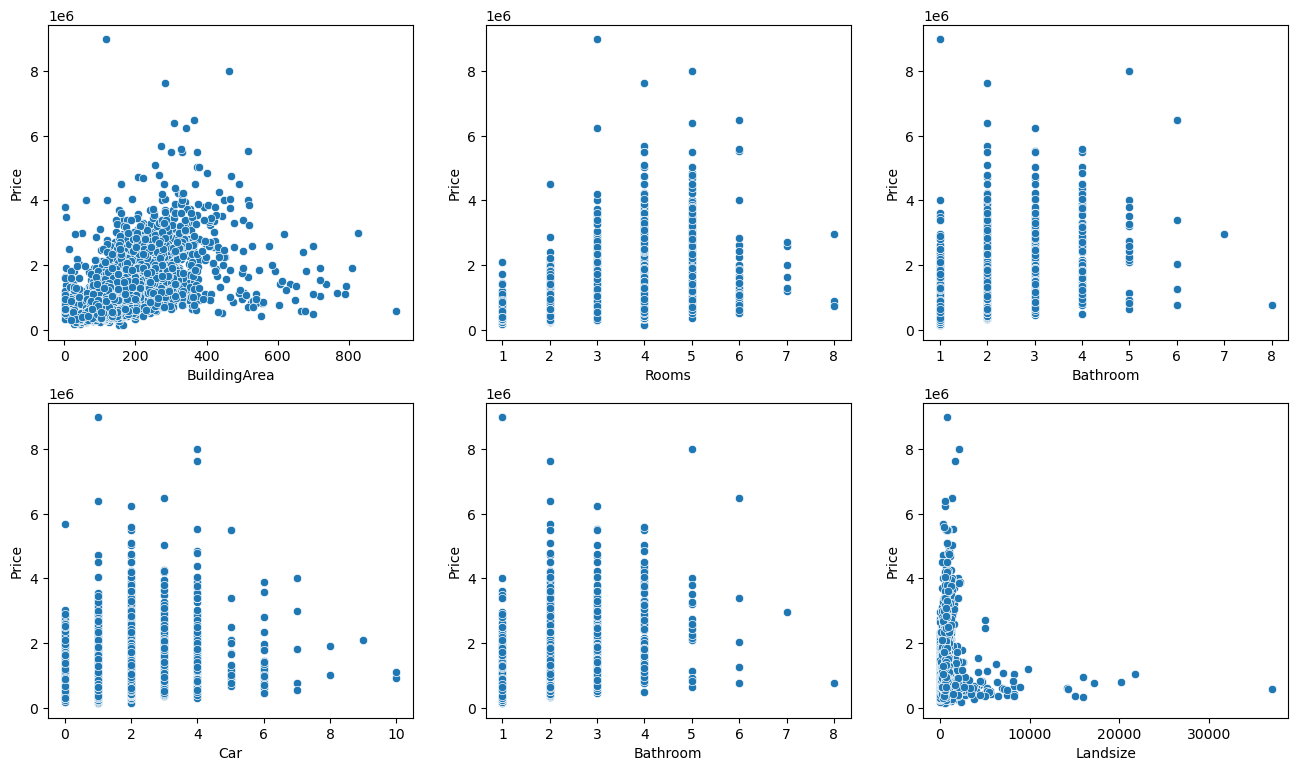

In [23]:

fig, axes = plt.subplots(ncols=3,nrows=2,figsize=(16,9))
sns.scatterplot(
    data = df,
    x = "BuildingArea",
    y = "Price",
    ax=axes[0][0]
)
sns.scatterplot(
    data = df,
    x = "Rooms",
    y = "Price",
    ax=axes[0][1]
)
sns.scatterplot(
    data = df,
    x = "Bathroom",
    y = "Price",
    ax=axes[0][2]
)
sns.scatterplot(
    data = df,
    x = "Car",
    y = "Price",
    ax=axes[1][0]
)
sns.scatterplot(
    data = df,
    x = "Bathroom",
    y = "Price",
    ax=axes[1][1]
)
sns.scatterplot(
    data = df,
    x = "Landsize",
    y = "Price",
    ax=axes[1][2]
)
plt.show()

In [24]:
df = df[(df['Landsize']>0)&(df['Landsize']<2000)]

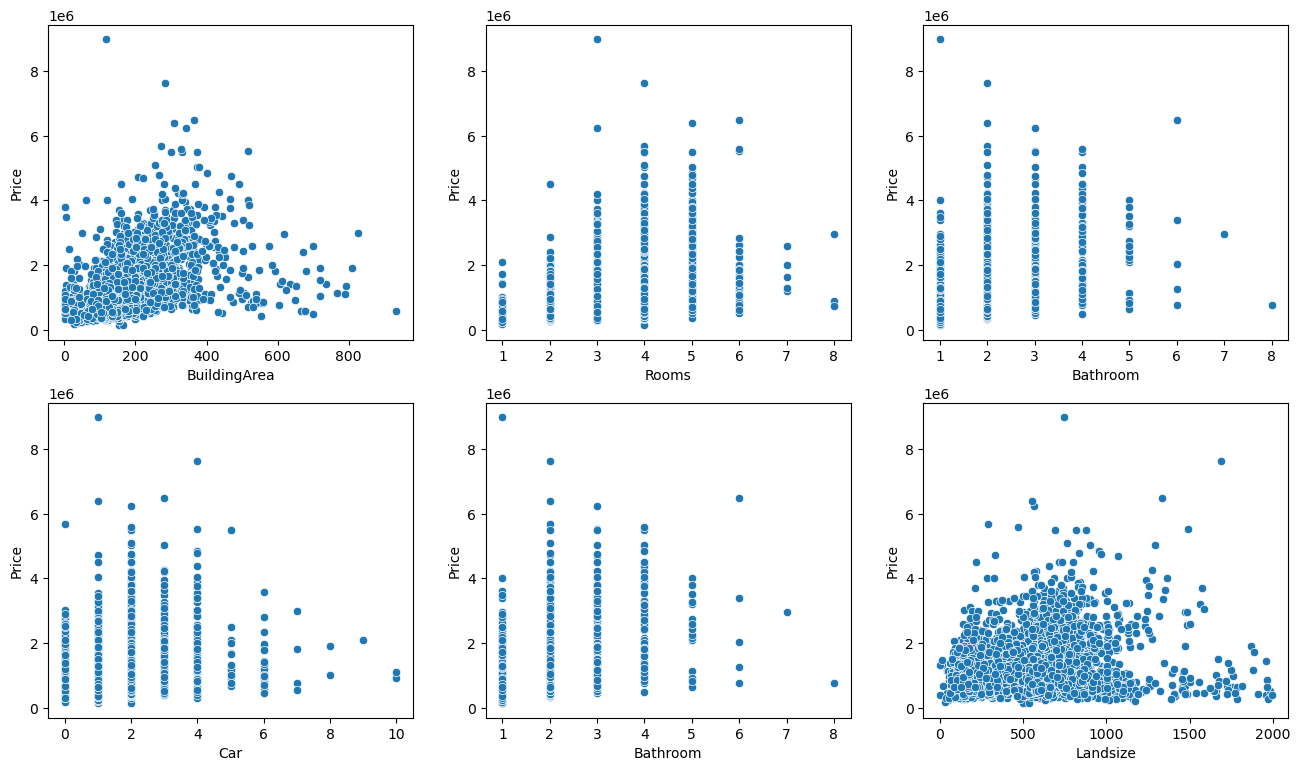

In [25]:

fig, axes = plt.subplots(ncols=3,nrows=2,figsize=(16,9))
sns.scatterplot(
    data = df,
    x = "BuildingArea",
    y = "Price",
    ax=axes[0][0]
)
sns.scatterplot(
    data = df,
    x = "Rooms",
    y = "Price",
    ax=axes[0][1]
)
sns.scatterplot(
    data = df,
    x = "Bathroom",
    y = "Price",
    ax=axes[0][2]
)
sns.scatterplot(
    data = df,
    x = "Car",
    y = "Price",
    ax=axes[1][0]
)
sns.scatterplot(
    data = df,
    x = "Bathroom",
    y = "Price",
    ax=axes[1][1]
)
sns.scatterplot(
    data = df,
    x = "Landsize",
    y = "Price",
    ax=axes[1][2]
)
plt.show()

In [26]:
df

,Rooms,Bathroom,Car,Landsize,BuildingArea,Price
0,2,1.0,0.0,156.0,79.0,1035000.0
1,3,2.0,0.0,134.0,150.0,1465000.0
2,4,1.0,2.0,120.0,142.0,1600000.0
3,3,2.0,0.0,245.0,210.0,1876000.0
4,2,1.0,2.0,256.0,107.0,1636000.0
...,...,...,...,...,...,...
7096,2,1.0,1.0,210.0,79.0,650000.0
7097,4,2.0,1.0,662.0,172.0,635000.0
7098,3,2.0,2.0,333.0,133.0,1031000.0
7099,4,1.0,5.0,866.0,157.0,2500000.0


(A bit of) Feature engineering selesai. Saatnya split data jadi train dan test. Kita pakai rumus 80:20, 80% data untuk training, 20% data untuk testing

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Price', axis=1), df['Price'], test_size=0.15, random_state=13
)

Fitting the model

In [28]:
from sklearn.linear_model import LinearRegression

simple_linear_reg_model = LinearRegression(positive=True).fit(X = X_train,y =  y_train)

Evaluate the model against the training dataset

In [29]:
simple_linear_reg_model.score(X=X_train,y=y_train)

0.31199327392607923

Evaluate the model against test dataset

In [30]:
simple_linear_reg_model.score(X=X_test,y=y_test)

0.26264375375094473

Explore model parameters

In [31]:
simple_linear_reg_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}

Get Coefficients

In [32]:
cdf = pd.DataFrame(simple_linear_reg_model.coef_, X_train.columns, columns=['Coefficients'])
cdf

,Coefficients
Rooms,106636.294887
Bathroom,173211.000457
Car,0.000000
Landsize,137.267788
BuildingArea,2514.199054


In [33]:
simple_linear_reg_model.intercept_

83749.17547229957

Possible Improvement - Gradient boosting model

In [34]:
from sklearn import datasets, ensemble

params = {
    "n_estimators": 360,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)

Fit the model

In [35]:
GradientBoostModel = reg.fit(X_train, y_train)

Test the model against train dataset

In [36]:
GradientBoostModel.score(pd.DataFrame(X_train), y_train)

0.4858452426311156

Test the model against test dataset

In [37]:
GradientBoostModel.score(pd.DataFrame(X_test), y_test)

0.3379959011953816

How to do model comparison: Using metrics

In [38]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error

Perhitungan MSE untuk Kedua model

In [39]:
y_pred_linear_model = simple_linear_reg_model.predict(X_test)
MSE_linear_model = mean_squared_error(y_true = y_test, y_pred = y_pred_linear_model)
print("MSE untuk linear model: ",MSE_linear_model)

MSE untuk linear model:  299815351908.3833


In [40]:
y_pred_GBM_model = GradientBoostModel.predict(X_test)
MSE_GBM_model = mean_squared_error(y_true = y_test, y_pred = y_pred_GBM_model)
print("MSE untuk GBM model: ",MSE_GBM_model)

MSE untuk GBM model:  269176524722.70367


In [41]:
MSE_linear_model > MSE_GBM_model

True

Perhitungan RMSE untuk kedua model

In [42]:
RMSE_linear_model = root_mean_squared_error(y_true = y_test, y_pred = y_pred_linear_model)
print("RMSE untuk linear model: ",RMSE_linear_model)

RMSE untuk linear model:  547553.9716853338


In [43]:
RMSE_GBM_model = root_mean_squared_error(y_true = y_test, y_pred = y_pred_GBM_model)
print("RMSE untuk GBM model: ",RMSE_GBM_model)

RMSE untuk GBM model:  518822.2477137075
